<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - MATIC</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_MATIC.csv')
df

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,1.379862,1.379862,1.465750,1.368370,1.417712,6.526199e+08
1822,2022-04-22,1.399139,1.399139,1.496747,1.374800,1.379697,1.281223e+09
1823,2022-04-23,1.365971,1.365971,1.406944,1.350815,1.399106,5.494467e+08
1824,2022-04-24,1.344245,1.344245,1.373304,1.335365,1.365753,4.209603e+08


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1826 non-null   object 
 1   MATIC-USD_ADJCLOSE  1094 non-null   float64
 2   MATIC-USD_CLOSE     1094 non-null   float64
 3   MATIC-USD_HIGH      1094 non-null   float64
 4   MATIC-USD_LOW       1094 non-null   float64
 5   MATIC-USD_OPEN      1094 non-null   float64
 6   MATIC-USD_VOLUME    1094 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
MATIC-USD_ADJCLOSE,732
MATIC-USD_CLOSE,732
MATIC-USD_HIGH,732
MATIC-USD_LOW,732
MATIC-USD_OPEN,732
MATIC-USD_VOLUME,732


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MATIC-USD_ADJCLOSE,1094.0,5.445221e-01,7.476557e-01,3.141000e-03,1.661275e-02,2.279150e-02,1.270481e+00,2.876757e+00
MATIC-USD_CLOSE,1094.0,5.445221e-01,7.476557e-01,3.141000e-03,1.661275e-02,2.279150e-02,1.270481e+00,2.876757e+00
MATIC-USD_HIGH,1094.0,5.742551e-01,7.878714e-01,3.380000e-03,1.733325e-02,2.461200e-02,1.346856e+00,2.923235e+00
MATIC-USD_LOW,1094.0,5.137250e-01,7.072027e-01,3.012000e-03,1.576600e-02,2.142400e-02,1.192344e+00,2.712710e+00
MATIC-USD_OPEN,1094.0,5.435889e-01,7.479900e-01,3.143000e-03,1.661575e-02,2.277200e-02,1.264971e+00,2.876459e+00
MATIC-USD_VOLUME,1094.0,5.387260e+08,9.962211e+08,2.938835e+06,1.772250e+07,5.196713e+07,7.551255e+08,9.181248e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
1719,2022-01-09,2.115518,2.115518,2.163339,1.976117,1.995515,1.097561e+09
111,2017-08-15,NaN,NaN,NaN,NaN,NaN,NaN
877,2019-09-20,0.013663,0.013663,0.013881,0.013502,0.013745,6.910674e+06
1170,2020-07-09,0.020698,0.020698,0.021681,0.019895,0.021634,2.816988e+07
329,2018-03-21,NaN,NaN,NaN,NaN,NaN,NaN
338,2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN
642,2019-01-28,NaN,NaN,NaN,NaN,NaN,NaN
116,2017-08-20,NaN,NaN,NaN,NaN,NaN,NaN
546,2018-10-24,NaN,NaN,NaN,NaN,NaN,NaN
1370,2021-01-25,0.032978,0.032978,0.036837,0.032954,0.033176,3.590421e+07


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
727,2019-04-23,NaN,NaN,NaN,NaN,NaN,NaN
728,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN
729,2019-04-25,NaN,NaN,NaN,NaN,NaN,NaN
730,2019-04-26,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2019-04-28,0.004421,0.004421,0.004545,0.004317,0.004521,8.408136e+06
1,2019-04-29,0.003471,0.003471,0.004492,0.003471,0.004418,8.267044e+06
2,2019-04-30,0.004478,0.004478,0.005078,0.003458,0.003462,2.507271e+07
3,2019-05-01,0.004374,0.004374,0.004673,0.004071,0.004440,1.056735e+07
4,2019-05-02,0.004198,0.004198,0.004700,0.004096,0.004366,6.714908e+06
...,...,...,...,...,...,...,...
1089,2022-04-21,1.379862,1.379862,1.465750,1.368370,1.417712,6.526199e+08
1090,2022-04-22,1.399139,1.399139,1.496747,1.374800,1.379697,1.281223e+09
1091,2022-04-23,1.365971,1.365971,1.406944,1.350815,1.399106,5.494467e+08
1092,2022-04-24,1.344245,1.344245,1.373304,1.335365,1.365753,4.209603e+08


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2019-04-28,0.004421,0.004421,0.004545,0.004317,0.004521,8.408136e+06
1,2019-04-29,0.003471,0.003471,0.004492,0.003471,0.004418,8.267044e+06
2,2019-04-30,0.004478,0.004478,0.005078,0.003458,0.003462,2.507271e+07
3,2019-05-01,0.004374,0.004374,0.004673,0.004071,0.004440,1.056735e+07
4,2019-05-02,0.004198,0.004198,0.004700,0.004096,0.004366,6.714908e+06
...,...,...,...,...,...,...,...
1089,2022-04-21,1.379862,1.379862,1.465750,1.368370,1.417712,6.526199e+08
1090,2022-04-22,1.399139,1.399139,1.496747,1.374800,1.379697,1.281223e+09
1091,2022-04-23,1.365971,1.365971,1.406944,1.350815,1.399106,5.494467e+08
1092,2022-04-24,1.344245,1.344245,1.373304,1.335365,1.365753,4.209603e+08


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2019-04-28,0.004421,0.004421,0.004545,0.004317,0.004521,8408136.0,2.261938,5.281442
1,2019-04-29,0.003471,0.003471,0.004492,0.003471,0.004418,8267044.0,27.283211,29.415164
2,2019-04-30,0.004478,0.004478,0.005078,0.003458,0.003462,25072706.0,22.688701,46.847889
3,2019-05-01,0.004374,0.004374,0.004673,0.004071,0.004440,10567352.0,1.508917,14.787520
4,2019-05-02,0.004198,0.004198,0.004700,0.004096,0.004366,6714908.0,4.001914,14.746092


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

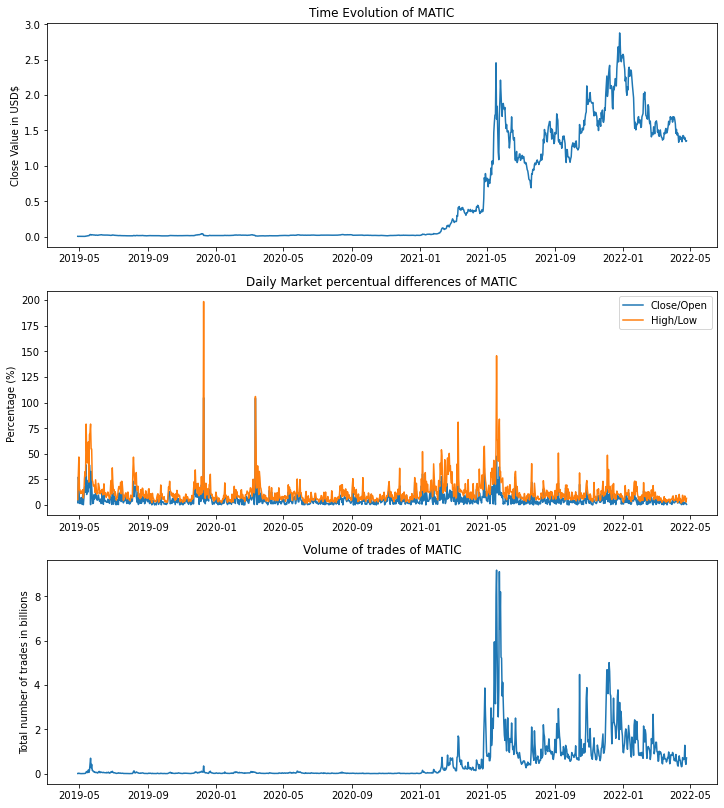

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-07-01']
df

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
795,2021-07-01,1.077357,1.077357,1.167458,1.064672,1.167458,5.962235e+08,8.363152,9.654247
796,2021-07-02,1.103611,1.103611,1.109534,1.044572,1.074200,4.836585e+08,2.664975,6.219009
797,2021-07-03,1.118638,1.118638,1.145669,1.080955,1.102771,4.238340e+08,1.418421,5.986739
798,2021-07-04,1.147865,1.147865,1.178456,1.095695,1.117961,5.104764e+08,2.605185,7.553282
799,2021-07-05,1.101610,1.101610,1.149955,1.082397,1.146954,4.860956e+08,4.116168,6.241522
...,...,...,...,...,...,...,...,...,...
1089,2022-04-21,1.379862,1.379862,1.465750,1.368370,1.417712,6.526199e+08,2.743030,7.116490
1090,2022-04-22,1.399139,1.399139,1.496747,1.374800,1.379697,1.281223e+09,1.389575,8.870167
1091,2022-04-23,1.365971,1.365971,1.406944,1.350815,1.399106,5.494467e+08,2.425751,4.155193
1092,2022-04-24,1.344245,1.344245,1.373304,1.335365,1.365753,4.209603e+08,1.600013,2.841092


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(7, df)
windowed_df['Date'] = df.iloc[7:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue,Date
0,1.128411,1.131786,1.101610,1.147865,1.118638,1.103611,1.077357,1.043340,2021-07-08
1,1.043340,1.128411,1.131786,1.101610,1.147865,1.118638,1.103611,1.051329,2021-07-09
2,1.051329,1.043340,1.128411,1.131786,1.101610,1.147865,1.118638,1.029878,2021-07-10
3,1.029878,1.051329,1.043340,1.128411,1.131786,1.101610,1.147865,1.042152,2021-07-11
4,1.042152,1.029878,1.051329,1.043340,1.128411,1.131786,1.101610,0.996988,2021-07-12
...,...,...,...,...,...,...,...,...,...
287,1.417744,1.428176,1.421155,1.340074,1.390932,1.396421,1.372641,1.379862,2022-04-21
288,1.379862,1.417744,1.428176,1.421155,1.340074,1.390932,1.396421,1.399139,2022-04-22
289,1.399139,1.379862,1.417744,1.428176,1.421155,1.340074,1.390932,1.365971,2022-04-23
290,1.365971,1.399139,1.379862,1.417744,1.428176,1.421155,1.340074,1.344245,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((292,), (292, 7, 1), (292,))

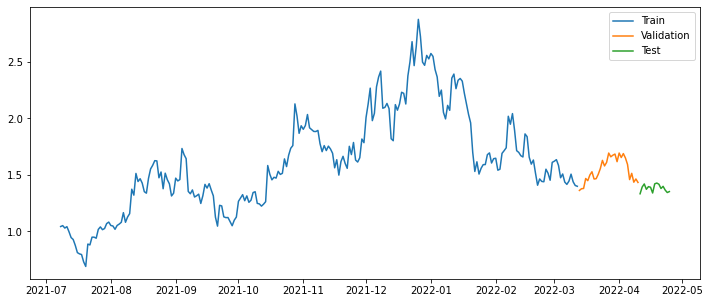

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .85)
q_90 = int(len(dates) * .95)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [20]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((7, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [21]:
#BEST SOLUTION OF THE MODEL

# MSE=0.003
# Batch Size: 100
# Number of Epochs: 100
# Value of Learning Rate: 0.1
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

model = Sequential([layers.Input((7, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.1),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=100, verbose=2)

Epoch 1/100
3/3 - 2s - loss: 217.1404 - mean_absolute_error: 10.1857 - val_loss: 2.0833 - val_mean_absolute_error: 1.4410 - 2s/epoch - 510ms/step
Epoch 2/100
3/3 - 0s - loss: 6.9966 - mean_absolute_error: 2.4377 - val_loss: 0.8128 - val_mean_absolute_error: 0.8953 - 27ms/epoch - 9ms/step
Epoch 3/100
3/3 - 0s - loss: 1.1136 - mean_absolute_error: 0.8054 - val_loss: 0.2198 - val_mean_absolute_error: 0.4575 - 26ms/epoch - 9ms/step
Epoch 4/100
3/3 - 0s - loss: 0.7151 - mean_absolute_error: 0.7937 - val_loss: 0.1237 - val_mean_absolute_error: 0.3323 - 26ms/epoch - 9ms/step
Epoch 5/100
3/3 - 0s - loss: 0.2926 - mean_absolute_error: 0.4262 - val_loss: 0.4557 - val_mean_absolute_error: 0.6658 - 27ms/epoch - 9ms/step
Epoch 6/100
3/3 - 0s - loss: 0.6362 - mean_absolute_error: 0.6819 - val_loss: 0.1242 - val_mean_absolute_error: 0.3382 - 24ms/epoch - 8ms/step
Epoch 7/100
3/3 - 0s - loss: 0.3740 - mean_absolute_error: 0.4631 - val_loss: 0.0211 - val_mean_absolute_error: 0.1176 - 27ms/epoch - 9ms/s

Epoch 58/100
3/3 - 0s - loss: 0.0199 - mean_absolute_error: 0.1026 - val_loss: 0.0044 - val_mean_absolute_error: 0.0527 - 26ms/epoch - 9ms/step
Epoch 59/100
3/3 - 0s - loss: 0.0197 - mean_absolute_error: 0.1023 - val_loss: 0.0043 - val_mean_absolute_error: 0.0530 - 26ms/epoch - 9ms/step
Epoch 60/100
3/3 - 0s - loss: 0.0200 - mean_absolute_error: 0.1055 - val_loss: 0.0041 - val_mean_absolute_error: 0.0516 - 25ms/epoch - 8ms/step
Epoch 61/100
3/3 - 0s - loss: 0.0185 - mean_absolute_error: 0.0985 - val_loss: 0.0063 - val_mean_absolute_error: 0.0648 - 24ms/epoch - 8ms/step
Epoch 62/100
3/3 - 0s - loss: 0.0194 - mean_absolute_error: 0.1069 - val_loss: 0.0047 - val_mean_absolute_error: 0.0543 - 25ms/epoch - 8ms/step
Epoch 63/100
3/3 - 0s - loss: 0.0244 - mean_absolute_error: 0.1158 - val_loss: 0.0063 - val_mean_absolute_error: 0.0621 - 25ms/epoch - 8ms/step
Epoch 64/100
3/3 - 0s - loss: 0.0224 - mean_absolute_error: 0.1112 - val_loss: 0.0164 - val_mean_absolute_error: 0.1159 - 26ms/epoch - 9

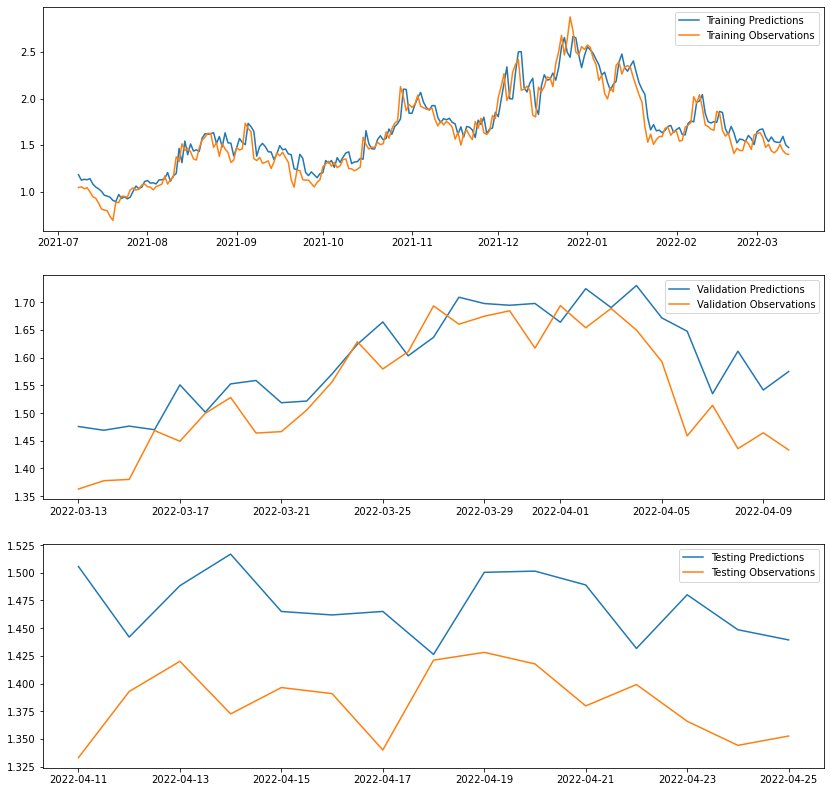

In [22]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [23]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

extra_dates = np.array(['2022-05-09', '2022-05-10', '2022-05-11'])
recursive_dates = np.append(recursive_dates,extra_dates)

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

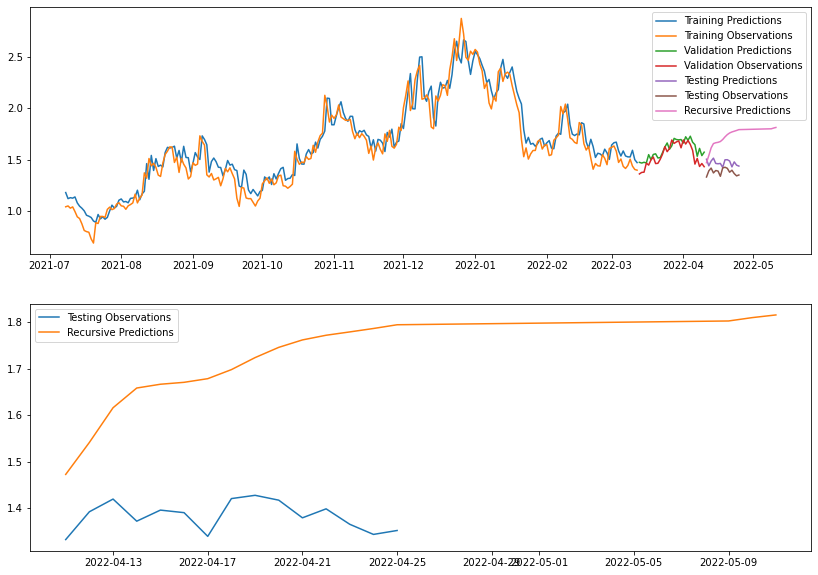

In [24]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')

In [25]:
may_10_prediction = coin_name +'-USD',recursive_predictions[-2][0]
may_10_prediction

('MATIC-USD', 1.8096159)